<a href="https://colab.research.google.com/github/jonahsjlee/programming/blob/main/EDA_And_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2: Question 1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/sample_data/airbnb_hw.csv')

df['Price'] = df['Price'].str.replace(',', '').astype(float)
df[df['Price'] >= 1000].sort_values('Price', ascending=False)
print( df.shape, '\n')
df.head()

(30478, 13) 



,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145.0,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37.0,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28.0,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199.0,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0


Question 2: What are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, Review Scores Rating.


Question 3: Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [4]:
pd.crosstab(df['Room Type'], df['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


It makes more sense that houses and apartments would be more open to rentals, as opposed to castles and lighthouses. Renting private rooms as opposed to the whole property are more common for bed & breakfast's, houses, castles, chalets, huts, dorms, tents and treehouses.

Question 4: For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

<Axes: xlabel='Price', ylabel='Count'>

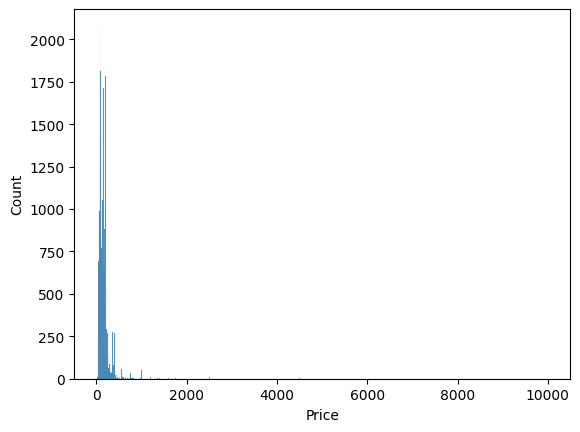

In [5]:
sns.histplot(data=df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

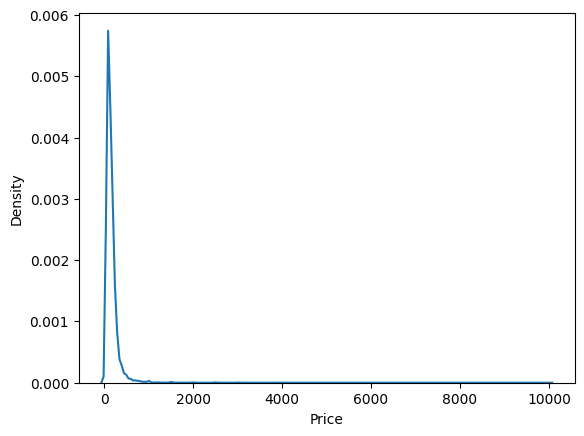

In [6]:
sns.kdeplot(data=df,x='Price')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

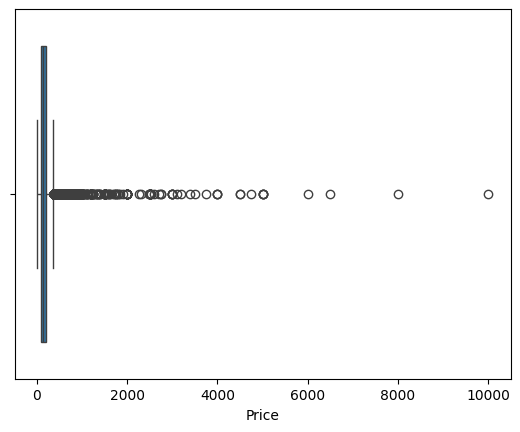

In [7]:
sns.boxplot(data=df,x='Price')

The data is badly scaled.

In [8]:
df['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


<Axes: xlabel='Price_log', ylabel='Count'>

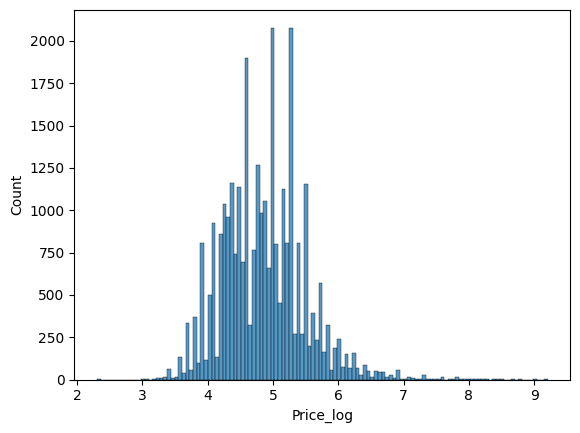

In [14]:
df['Price_log'] = np.log(df['Price'])
sns.histplot(data=df,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

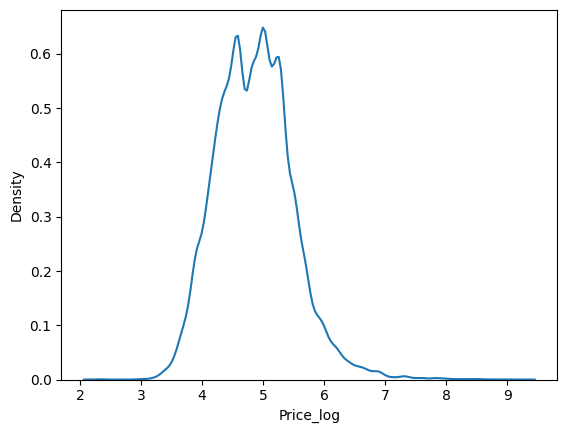

In [10]:
sns.kdeplot(data=df,x='Price_log')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price_log'>

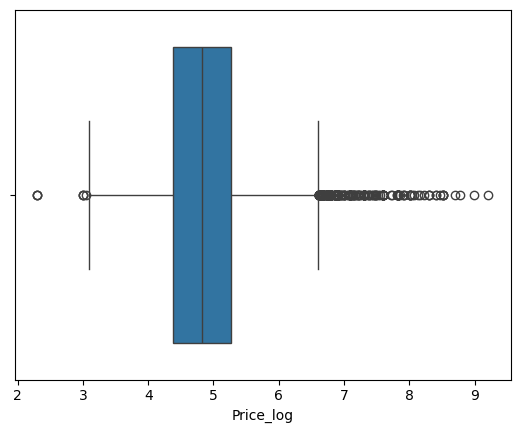

In [13]:
sns.boxplot(data=df,x='Price_log')

Question 5: Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.


<Axes: xlabel='Beds', ylabel='Price_log'>

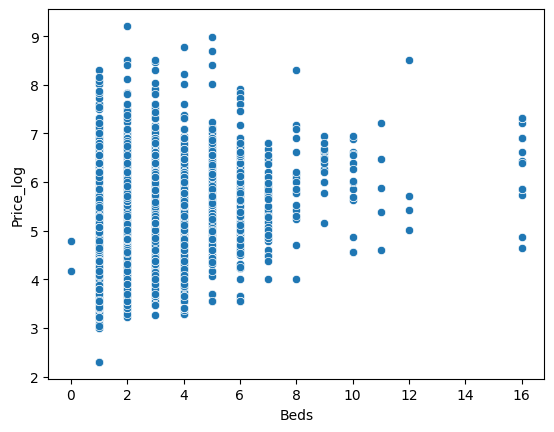

In [18]:
sns.scatterplot(x=df['Beds'], y=df['Price_log'])

In [15]:
df.groupby('Beds')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


It seems like there isn't really a pattern to the data except that the price seems to increase as the number of beds goes up.  

Question 6: Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

<Axes: xlabel='Beds', ylabel='Price_log'>

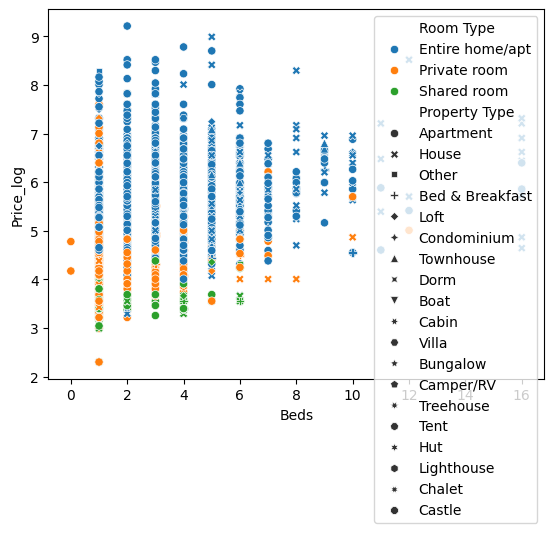

In [19]:
sns.scatterplot(x=df['Beds'], y=df['Price_log'], hue=df['Room Type'], style=df['Property Type'])

Entire home/apt's tend to be more expensive and concentrated around the center, while private + shared rooms are near the bottom because they are cheaper.

In [22]:
df.groupby(['Room Type', 'Property Type'])['Price'].describe()

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

Among entire home/apt's, villas tend to have the highest prices on average. Among private rooms, it's "other", and for shared rooms, it's treehouses.

Question 7: We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

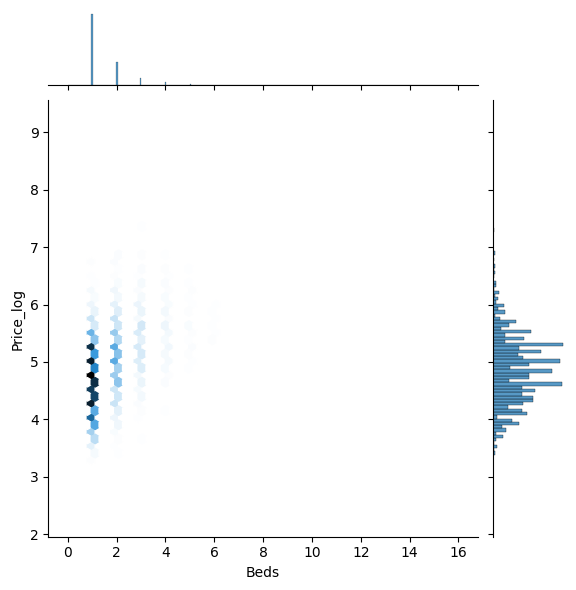

In [23]:
sns.jointplot(x=df['Beds'], y=df['Price_log'], kind='hex')

Price logs are mainly concentrated from around 3.5 to 6, and beds are in the range of around 1-4. In the other plots, a lot of the data was scattered all over the graph, but this jointplot is showing how it's concentrated around a specific area.

Q4: Question 2
Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/sample_data/sfpuf2021_2_winter.csv')
df.head()

<ipython-input-25-4b15ac61e10c>:5: DtypeWarning: Columns (19,26,27,29,30,31,32,33,34,35,36,37,38,53,68,70,71,72,76,78,79,80,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/sfpuf2021_2_winter.csv')


,PUF_ID,SURVEYYR,VERSION,ACW_D_ERVIST,ACW_D_OPVIST,ACW_OPDMCOND,ACW_OPDTESTS,ACW_OPDFOLUP,ACW_OPDCHKUP,ACW_OPDRFRL,...,PUFW091,PUFW092,PUFW093,PUFW094,PUFW095,PUFW096,PUFW097,PUFW098,PUFW099,PUFW100
0,21000003,2021,1,2,2,NaN,NaN,NaN,NaN,NaN,...,1045.706696,5760.232917,1238.819589,1582.321331,6297.836256,1185.119100,6019.837842,1456.820343,5761.356732,1084.494727
1,21000004,2021,1,1,1,1,0,0,0,0,...,27658.990088,4276.572219,3336.791049,3427.987761,5065.467427,19814.707032,21231.859461,19958.644413,19677.181033,23455.013407
2,21000005,2021,1,2,1,1,0,0,0,0,...,4439.859983,4199.383768,639.290869,4683.155905,650.140088,652.730993,4067.281632,5223.444080,683.351525,708.141568
3,21000012,2021,1,2,1,0,0,0,1,0,...,15977.647306,18303.716548,12642.452962,3281.139890,2823.675377,2669.230705,2778.022523,20252.307471,16618.873292,15288.345882
4,21000016,2021,1,2,2,NaN,NaN,NaN,NaN,NaN,...,16803.442783,2547.409961,2376.187558,2594.532512,2489.749054,2412.770126,2454.206100,3197.307724,3404.041493,18193.732515


Yes, the missing data is listed as NaN. I'm not really sure what the headers like "ACW_D_ERVIST" mean, but the other variables such as PUF_ID and SURVEYYR are intuitive/common sense.

Question 3: Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

I think PUF_ID and version are more interesting since they are more obvious. I decided to remove any duplicates under the PUF_ID column.


In [28]:
test = pd.read_csv('/content/sample_data/sfpuf2021_2_winter.csv')
test['PUF_ID'].drop_duplicates(inplace=True)
test.head()

<ipython-input-28-d94ecf7eec97>:1: DtypeWarning: Columns (19,26,27,29,30,31,32,33,34,35,36,37,38,53,68,70,71,72,76,78,79,80,93) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('/content/sample_data/sfpuf2021_2_winter.csv')


,PUF_ID,SURVEYYR,VERSION,ACW_D_ERVIST,ACW_D_OPVIST,ACW_OPDMCOND,ACW_OPDTESTS,ACW_OPDFOLUP,ACW_OPDCHKUP,ACW_OPDRFRL,...,PUFW091,PUFW092,PUFW093,PUFW094,PUFW095,PUFW096,PUFW097,PUFW098,PUFW099,PUFW100
0,21000003,2021,1,2,2,NaN,NaN,NaN,NaN,NaN,...,1045.706696,5760.232917,1238.819589,1582.321331,6297.836256,1185.119100,6019.837842,1456.820343,5761.356732,1084.494727
1,21000004,2021,1,1,1,1,0,0,0,0,...,27658.990088,4276.572219,3336.791049,3427.987761,5065.467427,19814.707032,21231.859461,19958.644413,19677.181033,23455.013407
2,21000005,2021,1,2,1,1,0,0,0,0,...,4439.859983,4199.383768,639.290869,4683.155905,650.140088,652.730993,4067.281632,5223.444080,683.351525,708.141568
3,21000012,2021,1,2,1,0,0,0,1,0,...,15977.647306,18303.716548,12642.452962,3281.139890,2823.675377,2669.230705,2778.022523,20252.307471,16618.873292,15288.345882
4,21000016,2021,1,2,2,NaN,NaN,NaN,NaN,NaN,...,16803.442783,2547.409961,2376.187558,2594.532512,2489.749054,2412.770126,2454.206100,3197.307724,3404.041493,18193.732515


Question 4: For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='PUF_ID'>

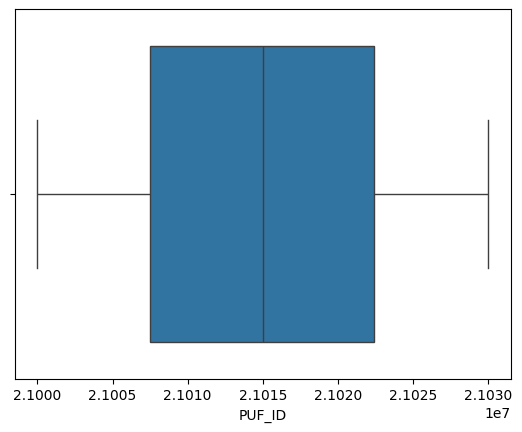

In [29]:
sns.boxplot(x=df['PUF_ID'], data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='VERSION'>

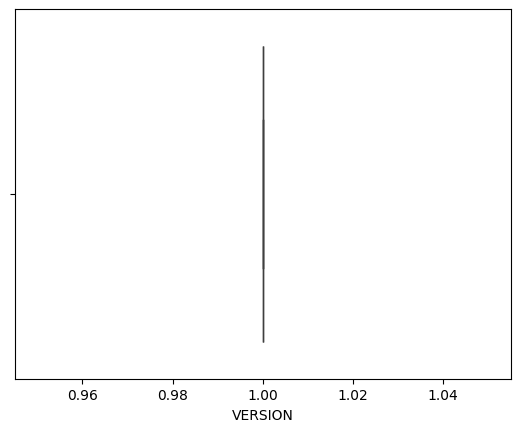

In [31]:
sns.boxplot(x=df['VERSION'], data=df)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='PUFW091'>

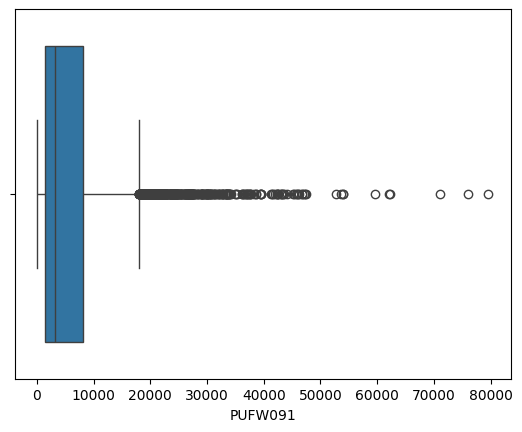

In [32]:
sns.boxplot(x=df['PUFW091'], data=df)

Seems like there aren't any outliers.

Question 5: Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

(array([7.970e+03, 2.031e+03, 4.240e+02, 1.220e+02, 4.600e+01, 2.500e+01,
        4.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([7.61331862e+01, 8.02946646e+03, 1.59827997e+04, 2.39361330e+04,
        3.18894663e+04, 3.98427996e+04, 4.77961328e+04, 5.57494661e+04,
        6.37027994e+04, 7.16561327e+04, 7.96094660e+04]),
 <BarContainer object of 10 artists>)

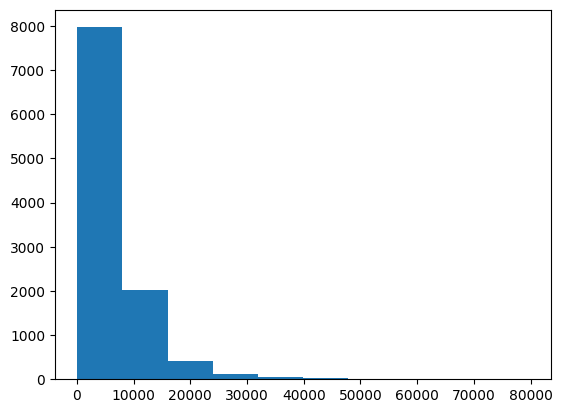

In [33]:
plt.hist(df['PUFW091'])

Most of the data is concentrated around the first couple ten thousands.

Question 6: Create a scatter plot, and describe the relationship you see.

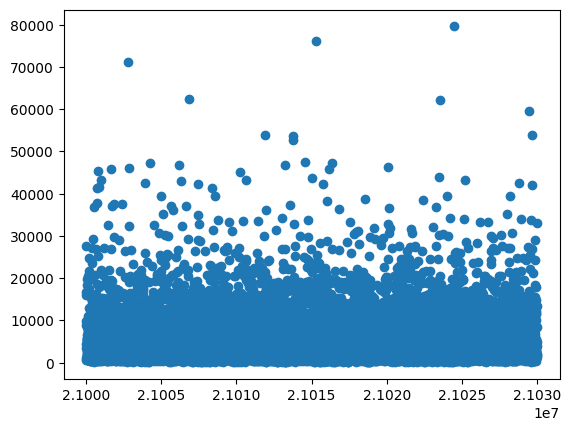

In [34]:
plt.scatter(df['PUF_ID'], df['PUFW091'])

Most patients have their PUFW091 in the early ten thousands, as mentioned previously.

Question 7: Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [35]:
test.describe()

,PUF_ID,SURVEYYR,VERSION,ACW_NOTAVAIL,PUFWWGT,PUFW001,PUFW002,PUFW003,PUFW004,PUFW005,...,PUFW091,PUFW092,PUFW093,PUFW094,PUFW095,PUFW096,PUFW097,PUFW098,PUFW099,PUFW100
count,1.062800e+04,10628.0,10628.0,10019.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,...,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000,10628.000000
mean,2.101497e+07,2021.0,1.0,1.996606,5624.607990,5638.943856,5636.887778,5634.338257,5656.098380,5626.344409,...,5631.960581,5604.019493,5635.525823,5628.873270,5653.875593,5640.544931,5617.502471,5626.832418,5641.326028,5636.994692
std,8.618812e+03,0.0,0.0,0.386935,4033.232153,6162.337963,6314.637398,6344.495476,6295.082838,6239.125419,...,6241.923432,6234.274818,6117.214783,6299.528082,6403.478529,6280.810451,6474.645254,6300.566295,6444.099292,6449.542974
min,2.100000e+07,2021.0,1.0,1.000000,225.127209,55.962595,95.932961,73.040753,96.748733,71.792547,...,76.133186,83.797705,56.627265,91.809724,84.413873,70.741327,65.960880,61.755915,70.519706,69.804030
25%,2.100746e+07,2021.0,1.0,2.000000,3151.585514,1405.918274,1439.638682,1415.252576,1448.968032,1431.259162,...,1424.957523,1456.184449,1441.844600,1437.637095,1406.125503,1437.463215,1401.851661,1436.805459,1411.674017,1406.663131
50%,2.101500e+07,2021.0,1.0,2.000000,4755.819843,3562.203156,3366.707181,3344.886902,3597.276018,3281.769760,...,3215.138800,3283.166063,3387.470466,3235.822245,3319.373892,3458.290672,3193.576424,3226.906518,3253.452700,3128.501084
75%,2.102242e+07,2021.0,1.0,2.000000,6864.677185,8090.798252,8008.993332,8116.340571,8034.352935,8105.823070,...,8033.702258,7904.317878,8148.284180,7995.134268,8102.549687,8015.295325,8023.687943,8016.280815,8080.776286,8110.245041
max,2.103000e+07,2021.0,1.0,4.000000,55674.556218,71921.314506,96137.836674,115085.952100,102968.046520,95800.646741,...,79609.465954,105845.932310,81061.092010,76648.744381,98299.748765,84671.837282,100728.115900,93857.997997,106966.145660,107186.121960


For min and max PUFWWGT, the range is wide, from 225 to 55674, but the mean is 5624.